[Reference](https://medium.com/@nafiu.dev/stock-market-prediction-using-lstm-will-the-price-go-up-tomorrow-practical-guide-d1df2d54a517)

In [22]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
data = yf.download("GOOGL" , start = "2019-01-01" , interval = '1d')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,51.360001,53.039501,51.264000,52.734001,52.734001,31868000
2019-01-03,52.533501,53.313000,51.118500,51.273499,51.273499,41960000
2019-01-04,52.127998,54.000000,51.842999,53.903500,53.903500,46022000
2019-01-07,54.048500,54.134998,53.132000,53.796001,53.796001,47446000
2019-01-08,54.299999,54.667500,53.417500,54.268501,54.268501,35414000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 943 entries, 2019-01-02 to 2022-09-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       943 non-null    float64
 1   High       943 non-null    float64
 2   Low        943 non-null    float64
 3   Close      943 non-null    float64
 4   Adj Close  943 non-null    float64
 5   Volume     943 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 51.6 KB


In [26]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data.isnull().sum().sum()

0

In [27]:
data.duplicated().any()

False

In [28]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')

In [29]:
data.isnull().sum().sum()

0

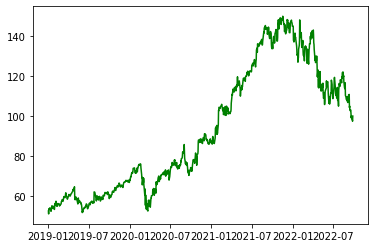

In [30]:
plt.plot(data.index, data['Close'], color='green', label='Close')
plt.show()

# Data processing


In [31]:
dataV1 = data.iloc[:,3:4]
dataV1 = dataV1.values

In [32]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))
dataV1 = Scaler.fit_transform(dataV1)

In [33]:
feature_length = 100

In [34]:
# Function to create x and y data
def Create_Features_and_Targets(data, feature_length):
  X = list()
  Y = list()
  for i in range(len(data) - feature_length -1):
    X.append(data[i:(i + feature_length), 0])
    Y.append(data[i + feature_length, 0])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y
# calling the function
X_train,y_train= Create_Features_and_Targets(dataV1,feature_length)

In [35]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape, y_train.shape

((842, 100, 1), (842,))

# Creating the model


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM

# model
model = Sequential([
   LSTM(100,return_sequences=True,input_shape=(X_train.shape[1],1)),
   Dropout(0.3),
   LSTM(100, return_sequences = False),
   Dropout(0.3),
    
   Dense(1),
])
model.compile(optimizer='adam',loss="mean_squared_error")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 100)          40800     
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Training the model
history = model.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 12, 
    verbose=1,
)

Epoch 1/100
71/71 [==============================] - 17s 191ms/step - loss: 0.0180
Epoch 2/100
71/71 [==============================] - 10s 143ms/step - loss: 0.0043
Epoch 3/100
71/71 [==============================] - 8s 113ms/step - loss: 0.0048
Epoch 4/100
71/71 [==============================] - 8s 113ms/step - loss: 0.0046
Epoch 5/100
71/71 [==============================] - 8s 114ms/step - loss: 0.0040
Epoch 6/100
71/71 [==============================] - 8s 113ms/step - loss: 0.0038
Epoch 7/100
71/71 [==============================] - 8s 111ms/step - loss: 0.0037
Epoch 8/100
71/71 [==============================] - 8s 113ms/step - loss: 0.0035
Epoch 9/100
71/71 [==============================] - 8s 113ms/step - loss: 0.0035
Epoch 10/100
71/71 [==============================] - 8s 112ms/step - loss: 0.0032
Epoch 11/100
71/71 [==============================] - 8s 112ms/step - loss: 0.0029
Epoch 12/100
71/71 [==============================] - 8s 113ms/step - loss: 0.0028
Epoch 13/10

# Testing and making predictions


In [17]:
testData = data.iloc[:,3:4] # Get 'Close' feature
y_real=testData.iloc[feature_length+1:,0:].values #Actual values
x_test = testData.iloc[:,0:].values # data to test
# normalizing the Data using Scaler.transform function
x_test = Scaler.transform(x_test)
x_test, y_test = Create_Features_and_Targets(x_test, feature_length)
# Making data 3 dimensional
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
y_pred = model.predict(x_test)
predicted_price = Scaler.inverse_transform(y_pred)

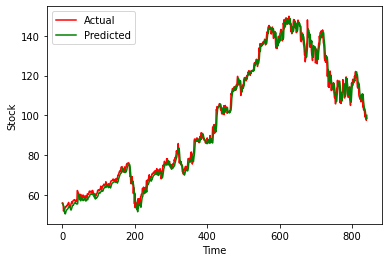

In [19]:
plt.plot(y_real, color = 'red', label = 'Actual')
plt.plot(predicted_price, color = 'green', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Stock')
plt.legend()
plt.show()

In [20]:
def predict_given_date(data, date, feature_length):
  if date not in data.index:
     data.loc[pd.Timestamp(date)] = 0
  idx = data.index.get_loc(date)
  close_col = data.iloc[:,3:4]
  close_col = close_col.iloc[idx - feature_length : idx,:].values
  close_col = np.expand_dims(Scaler.transform(close_col) , axis = 0)
  Prediction = model.predict(close_col)
  Prediction = Scaler.inverse_transform(Prediction)
  return Prediction
# calling the function
predict_given_date(data, '2022-09-20', feature_length)

array([[103.14113]], dtype=float32)

In [21]:
# only gives the dates that already exists in the dataset
l = data.index.get_loc('2022-09-20')
data.iloc[l: l+1,:]['Close']
# well we can see the predicted value is very close

Date
2022-09-20    101.139999
Name: Close, dtype: float64